In [275]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [281]:
class ODESystem:
    def __init__(self):
        d = 2
        e = 20
        w = 3*np.pi
        self.params = (d,e,w)
        self.t = np.linspace(0,5,1000)
        self.L = 1
        
    def func(self,y,t,d,e,w):
        x_1, x_2 = y
        dydt = [x_2, x_1 - d*x_2 - x_1**3 + e*np.cos(w*t)]
        return dydt
    
    def solve(self,y_0, params=None):
        if params == None:
            params = self.params
        self.sol = odeint(self.func, y_0, self.t, args=params)
        
        
        self.xList = self.L * np.sin(self.sol[:,0])
        self.yList = self.L * np.cos(self.sol[:,1])
        
        return self.sol
    
    def plotter(self):
        fig, axs = plt.subplots(2, 2, figsize=(8,6))
        axs[0,0].plot(self.sol[:,0])
        axs[0,0].grid()
        axs[0,0].set_xlabel("time")
        axs[0,0].set_ylabel("position")
        
        axs[0,1].plot(self.sol[:,1])
        axs[0,1].grid()
        axs[0,1].set_xlabel("time")
        axs[0,1].set_ylabel("velocity")
        
        axs[1,0].plot(self.sol[:,0],self.sol[:,1])
        axs[1,0].grid()
        axs[1,0].set_xlabel("position")
        axs[1,0].set_ylabel("velocity")
        
        axs[1,1].plot(self.xList, self.yList)
        axs[1,1].grid()
        axs[1,1].set_xlabel("x")
        axs[1,1].set_ylabel("y")
        
        plt.tight_layout()
        
    def animate(self):
        xData = self.xList
        yData = self.yList

        fig, ax = plt.subplots()
        line, = ax.plot([], [], 'o-', lw=2) # 'o-' creates a line with a circle at the end, representing the pendulum
        ax.set_xlim(min(xData), max(xData))
        ax.set_ylim(min(yData), max(yData))
        ani = FuncAnimation(fig, update, frames=int(len(xList)/2), init_func=init, blit=True, interval=30)

        return ani
        # To display the animation in a Jupyter notebook
        
        

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        length = 40
        if frame < length:
            initial = 0
        else:
            initial = frame - length
        #x, y = sol[initial:frame,0], sol[initial:frame,1]
        x, y = xList[initial:frame], yList[initial:frame]

        line.set_data(x,y) # Assuming the pendulum is fixed at the origin (0,0)
        return line,





    
    

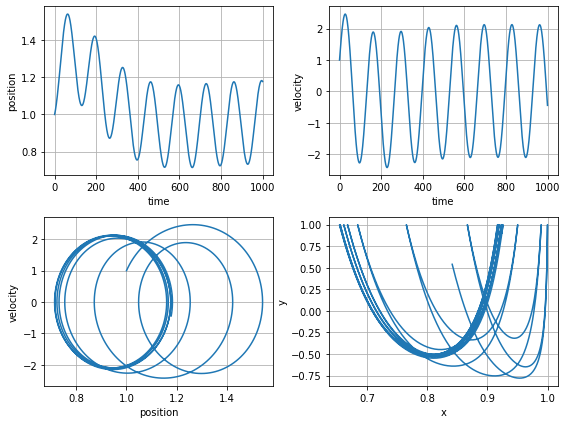

In [282]:
system1 = ODESystem() ## params = (d,e,w)
sol = system1.solve([1,1])
system1.plotter()

In [316]:
class HamiltonianSystem(ODESystem):
    def __init__(self):
        super().__init__()
        xRange = np.linspace(-2,2,50)
        self.X,self.Y = np.meshgrid(xRange, xRange)
        
        
    def func(self, y,t,d,e,w):
        x_1, x_2 = y
        dydt = [x_2, x_1 - x_1**3]
        return dydt

    def vectorField(self, X,Y):
        return Y, X - X**3

    def Hamilton(self, X,Y):
        return 0.5*Y**2 - 0.5*X**2 + 1/4*X**4
    
    
    def plotter(self):
        super().plotter()
        fig, axs = plt.subplots(1,2, figsize=(10,4))
#         axs[0].axvline([1],c='r')
#         axs[0].axvline([0],c='r')
#         axs[0].axvline([-1],c='r')
#         axs[0].axhline([0],c='g')
        self.U,self.V = self.vectorField(self.X,self.Y)
        axs[0].streamplot(self.X,self.Y,self.U,self.V,arrowsize=1)
        axs[0].set_xlabel("position")
        axs[0].set_ylabel("velocity")
        
        axs[1].contour(self.X,self.Y,self.Hamilton(self.X,self.Y), levels=10)
        axs[1].set_xlabel("position")
        axs[1].set_ylabel("velocity")
        
        

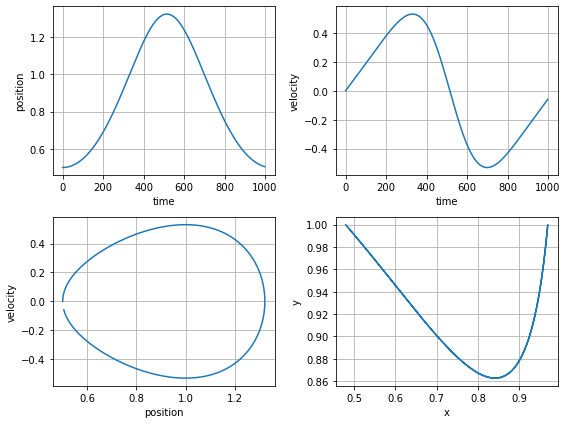

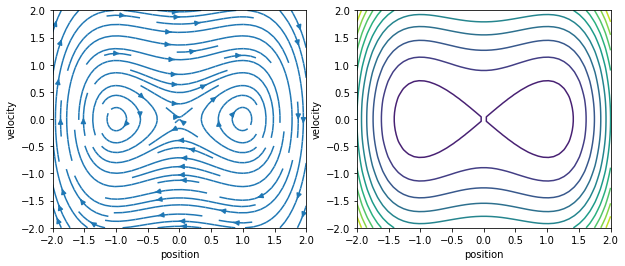

In [317]:
systemHamilton1 = HamiltonianSystem()
sol = systemHamilton1.solve([0.5,0])
systemHamilton1.plotter()

## Simple Pendulum

In [326]:
def func(self,y,t,d,e,w):
    x_1, x_2 = y
    dydt = [x_2, -np.sin(x_1)]
    return dydt

def vectorField(self, X,Y):
    return Y, -np.sin(X)

def Hamilton(self, X,Y):
    return 0.5*Y**2 - np.cos(X)


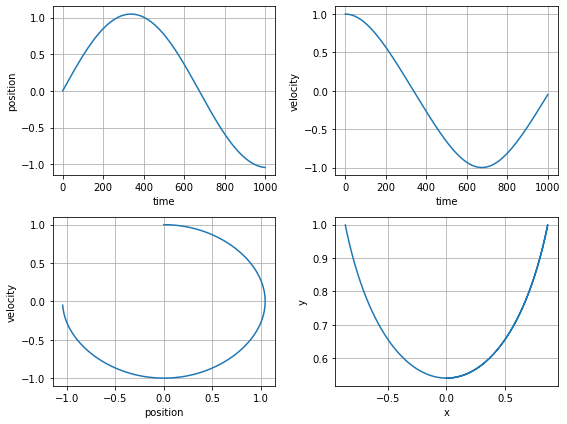

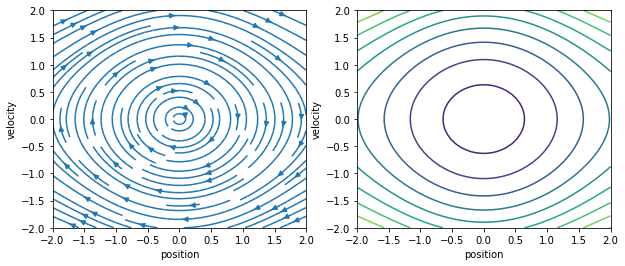

In [327]:
simplePendulum = HamiltonianSystem()
simplePendulum.func = func.__get__(simplePendulum, HamiltonianSystem)
simplePendulum.vectorField = vectorField.__get__(simplePendulum, HamiltonianSystem)
simplePendulum.Hamilton = Hamilton.__get__(simplePendulum, HamiltonianSystem)
sol = simplePendulum.solve([0,1])
simplePendulum.plotter()

In [5]:
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save

plt.plot([1, 2, 3], [1, 4, 9])
plt.title('Sample Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Save the figure to a TikZ file
tikz_save('mytikzfigure.tikz')

ModuleNotFoundError: No module named 'tikzplotlib'